In [1]:
#================================================
# DATA
#================================================

import duckdb, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# creating the conection to the duckdb database file:
con = duckdb.connect("movielens100K.duckdb")

In [2]:
IMDB_DIR = Path("..") / "data" / "Imdb"
IMDB_DIR

WindowsPath('../data/Imdb')

### 1.0 Temporary Views to query Imdb File composition
#### 1.1 Creation of view with File "name.basics.tsv"

In [3]:
# Creating the view for the name.basics file
con.sql(f"""
CREATE OR REPLACE VIEW imdb_name_basics AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "name.basics.tsv"}', delim='\t', header=TRUE)
""")

In [4]:
# Reviewing the structure of the imdb_name_basics table
con.sql("DESCRIBE imdb_name_basics").df()


,column_name,column_type,null,key,default,extra
0,nconst,VARCHAR,YES,None,None,None
1,primaryName,VARCHAR,YES,None,None,None
2,birthYear,VARCHAR,YES,None,None,None
3,deathYear,VARCHAR,YES,None,None,None
4,primaryProfession,VARCHAR,YES,None,None,None
5,knownForTitles,VARCHAR,YES,None,None,None


In [5]:
# Reviewing some data from the imdb_name_basics table
con.sql("SELECT * FROM imdb_name_basics LIMIT 3").df()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0025164"
1,nm0000002,Lauren Bacall,1924,2014,"actress,miscellaneous,soundtrack","tt0037382,tt0075213,tt0038355,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"


#### 1.2 Creation of view with File "title.basics.tsv"

In [6]:
# Creating the view for the title.basics file
con.sql(f"""
CREATE OR REPLACE view imdb_title_basics AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.basics.tsv"}', delim='\t', header=TRUE)
""")

In [7]:
# Reviewing the structure of the imdb_title_basics table
con.sql("describe imdb_title_basics").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,titleType,VARCHAR,YES,None,None,None
2,primaryTitle,VARCHAR,YES,None,None,None
3,originalTitle,VARCHAR,YES,None,None,None
4,isAdult,BIGINT,YES,None,None,None
5,startYear,VARCHAR,YES,None,None,None
6,endYear,VARCHAR,YES,None,None,None
7,runtimeMinutes,VARCHAR,YES,None,None,None
8,genres,VARCHAR,YES,None,None,None


In [8]:
# Reviewing some data from the imdb_title_basics table
con.sql("SELECT * FROM imdb_title_basics LIMIT 3").df()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"


#### 1.3 Creation of view with File "title.crew.tsv"

In [9]:
# Creating the view for the title.crew file
con.sql(f"""
CREATE OR REPLACE VIEW imdb_title_crew AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.crew.tsv"}', delim='\t', header=TRUE)
""")

In [10]:
# Reviewing the structure of the imdb_title_crew table
con.sql("DESCRIBE imdb_title_crew").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,directors,VARCHAR,YES,None,None,None
2,writers,VARCHAR,YES,None,None,None


In [11]:
# Reviewing some data from the imdb_title_crew table
con.sql("SELECT * FROM imdb_title_crew LIMIT 3").df()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,nm0721526


Database with important information: Director and writer name by movie.

#### 1.4 Creation of view with File "title.principals.tsv"

In [12]:
# Creating the view for the principals file
con.sql(f"""
CREATE OR REPLACE VIEW imdb_principals AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.principals.tsv"}', delim='\t', header=TRUE)
""")

In [13]:
# Reviewing the structure of the imdb_principals table
con.sql("DESCRIBE imdb_principals").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,ordering,BIGINT,YES,None,None,None
2,nconst,VARCHAR,YES,None,None,None
3,category,VARCHAR,YES,None,None,None
4,job,VARCHAR,YES,None,None,None
5,characters,VARCHAR,YES,None,None,None


In [14]:
# Reviewing some data from the imdb_principals table
con.sql("SELECT * FROM imdb_principals LIMIT 5").df()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N


#### 1.5 Creation of view with File "title.ratings.tsv"

In [15]:
# Creating the view for the title.episode file
con.sql(f"""
CREATE OR REPLACE VIEW imdb_ratings AS
SELECT *
FROM read_csv_auto('{IMDB_DIR / "title.ratings.tsv"}', delim='\t', header=TRUE)
""")

In [16]:
# Reviewing the structure of the imdb_ratings table
con.sql("DESCRIBE imdb_ratings").df()

,column_name,column_type,null,key,default,extra
0,tconst,VARCHAR,YES,None,None,None
1,averageRating,DOUBLE,YES,None,None,None
2,numVotes,BIGINT,YES,None,None,None


In [17]:
# Reviewing some data from the imdb_ratings table
con.sql("SELECT * FROM imdb_ratings LIMIT 5").df()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2183
1,tt0000002,5.5,304
2,tt0000003,6.4,2263
3,tt0000004,5.2,195
4,tt0000005,6.2,3006


#### 1.6 Summary of Imdb info

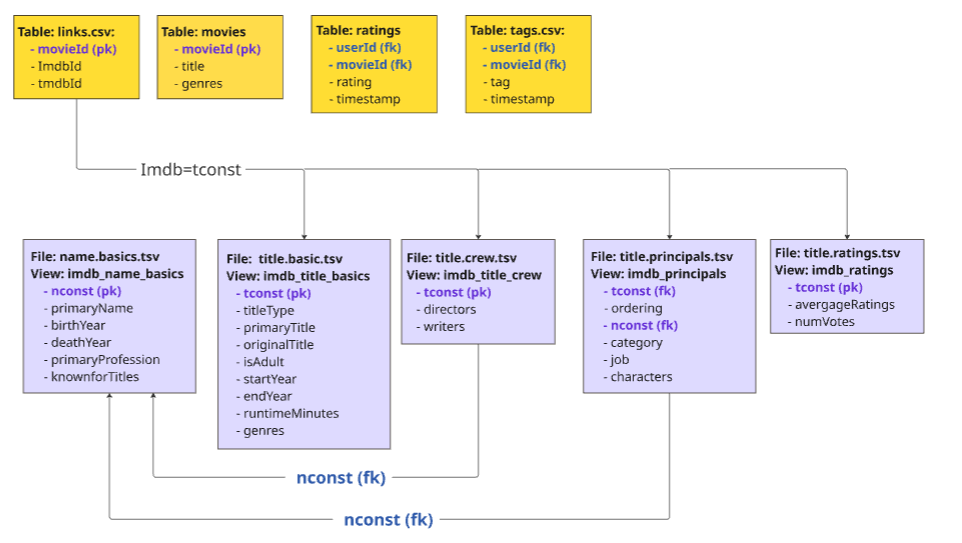

In [18]:
# List of all tables in the database
con.sql("""
SELECT table_name, table_type
FROM information_schema.tables
""").df()

,table_name,table_type
0,imdb_name_basics,VIEW
1,imdb_principals,VIEW
2,imdb_ratings,VIEW
3,imdb_title_basics,VIEW
4,imdb_title_crew,VIEW


### 2.0 Data enrichment with Imdb dataset
#### 2.1 Creation of table view with movies ID (imdb and movielens)

In [19]:
# Df Creation with link between movielens and Imdb links
con.sql("""
CREATE OR REPLACE VIEW imdb_map_ids AS
SELECT
    movieId,
    'tt' || LPAD(imdbId, 7, '0') AS tconst
FROM links
WHERE imdbId IS NOT NULL;
""")

CatalogException: Catalog Error: Table with name links does not exist!
Did you mean "pg_index"?

LINE 6: FROM links
             ^

In [ ]:
# Reviewing some data from the imdbmaps_ids table
con.sql("SELECT * FROM imdb_map_ids LIMIT 10").df()

,movieId,tconst
0,1,tt0114709
1,2,tt0113497
2,3,tt0113228
3,4,tt0114885
4,5,tt0113041
5,6,tt0113277
6,7,tt0114319
7,8,tt0112302
8,9,tt0114576
9,10,tt0113189


#### 2.2 Creation of table with movielens movie directors

In [ ]:
# Creation of table movielens_directors
con.sql("""
CREATE OR REPLACE TABLE movielens_directors AS
SELECT
    m.movieId,
    m.title,
    nb.primaryName AS director_name
FROM movies AS m
JOIN imdb_map_ids AS map ON map.movieId = m.movieId
JOIN imdb_title_crew AS c ON c.tconst = map.tconst
-- explode comma-separated directors into rows
CROSS JOIN UNNEST(str_split(c.directors, ',')) AS d(director_nconst_raw)
LEFT JOIN imdb_name_basics AS nb
    ON nb.nconst = TRIM(d.director_nconst_raw)
WHERE c.directors IS NOT NULL
  AND c.directors <> '';
""")


In [ ]:
# Reviewing some data from the imdb_principals table
con.sql("SELECT * FROM movielens_directors LIMIT 5").df()

,movieId,title,director_name
0,97921,Silver Linings Playbook (2012),David O. Russell
1,59118,Happy-Go-Lucky (2008),Mike Leigh
2,74275,I Love You Phillip Morris (2009),John Requa
3,69436,Year One (2009),Harold Ramis
4,62439,My Best Friend's Girl (2008),Howard Deutch


In [ ]:
# Query para determinar quantos fimes do nosso dataset original encontram aqui resposta para o seu director e quantos não encontrma
con.sql("""
WITH t AS (
    SELECT COUNT(*) AS total_movies FROM movies
),
d AS (
    SELECT COUNT(DISTINCT movieId) AS movies_with_director
    FROM movielens_directors
)
SELECT
    t.total_movies,
    d.movies_with_director,
    t.total_movies - d.movies_with_director AS movies_without_director
FROM t, d;
""").df()

,total_movies,movies_with_director,movies_without_director
0,9742,9719,23


#### 2.3 Creation of table with movielens movie writers

In [ ]:
# Creation of table movielens_writers
con.sql("""
CREATE OR REPLACE TABLE movielens_writers AS
SELECT
    m.movieId,
    m.title,
    nb.primaryName AS writer_name
FROM movies AS m
JOIN imdb_map_ids AS map
    ON map.movieId = m.movieId
JOIN imdb_title_crew AS c
    ON c.tconst = map.tconst
CROSS JOIN UNNEST(str_split(c.writers, ',')) AS d(writer_nconst_raw)
LEFT JOIN imdb_name_basics AS nb
    ON nb.nconst = TRIM(d.writer_nconst_raw)
WHERE c.writers IS NOT NULL
  AND c.writers <> ''
  AND c.writers <> '\\N';
""")


In [ ]:
# Reviewing some data from the imdb_principals table
con.sql("SELECT * FROM movielens_writers LIMIT 5").df()

,movieId,title,writer_name
0,142366,Cigarette Burns (2005),Rebecca Swan
1,90945,"Sign of Four, The (1987)",John Hawkesworth
2,166183,Junior and Karlson (1968),Boris Larin
3,55908,"Man from Earth, The (2007)",Jerome Bixby
4,56274,Margot at the Wedding (2007),Noah Baumbach


This table does not make sense. After visiting IMDB page is undertanded that there are several diferent writers but only one general wrting. 

link: https://www.imdb.com/title/tt0120762/fullcredits/?ref_=tt_ov_sm_2#amzn1.imdb.concept.name_credit_category.c84ecaff-add5-4f2e-81db-102a41881fe3
 

#### 2.4 Creation of table with movielens_actors

In [121]:
#criação da tabela movielens_actors
con.sql("""
CREATE OR REPLACE TABLE movielens_actors AS
SELECT
    m.movieId,
    m.title,
    nb.primaryName     AS actor_name,
    p.category,
    p.characters
FROM movies m
JOIN imdb_map_ids map ON map.movieId = m.movieId
JOIN imdb_principals p ON p.tconst = map.tconst
LEFT JOIN imdb_name_basics nb ON nb.nconst = p.nconst
WHERE p.category IN ('actor', 'actress');
""")

#remoção dos caracteres que nao queremos [" e "]:
con.sql("""
UPDATE movielens_actors
SET characters = REGEXP_REPLACE(characters, '[\\[\\]\"]', '', 'g')
""")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [122]:
# Reviewing some data from the imdb_principals table
con.sql("SELECT * FROM movielens_actors LIMIT 5").df()

,movieId,title,actor_name,category,characters
0,3617,Road Trip (2000),Breckin Meyer,actor,Josh
1,3617,Road Trip (2000),Seann William Scott,actor,E. L.
2,3617,Road Trip (2000),Amy Smart,actress,Beth
3,3617,Road Trip (2000),Paulo Costanzo,actor,Rubin
4,3617,Road Trip (2000),DJ Qualls,actor,Kyle


In [123]:
#remoção dos caracteres que nao queremos [" e "]:
con.sql("""
UPDATE movielens_actors
SET characters = REGEXP_REPLACE(characters, '[\\[\\]\"]', '', 'g')
""")


In [124]:
#Preview da tabela
con.sql("SELECT * FROM movielens_actors LIMIT 500").df()

,movieId,title,actor_name,category,characters
0,3617,Road Trip (2000),Breckin Meyer,actor,Josh
1,3617,Road Trip (2000),Seann William Scott,actor,E. L.
2,3617,Road Trip (2000),Amy Smart,actress,Beth
3,3617,Road Trip (2000),Paulo Costanzo,actor,Rubin
4,3617,Road Trip (2000),DJ Qualls,actor,Kyle
...,...,...,...,...,...
495,140852,964 Pinocchio (1991),Kôji Ôtsubo,actor,Narishima
496,140852,964 Pinocchio (1991),Kyoko Hara,actress,Secretary
497,140852,964 Pinocchio (1991),Rakumaro San'yûtei,actor,Taichô
498,140852,964 Pinocchio (1991),Kôta Mori,actor,Shimada


In [125]:
con.sql("SHOW TABLES").df()

,name
0,imdb_map_ids
1,imdb_name_basics
2,imdb_principals
3,imdb_ratings
4,imdb_title_akas
5,imdb_title_basics
6,imdb_title_crew
7,links
8,movielens_actors
9,movielens_directors


#### 2.5 Criação de tabela com avaliação os ratings e votos do imdb

In [126]:
# IMDb ratings mapped to MovieLens movieId
con.sql("""
CREATE OR REPLACE TABLE movielens_ratings_imdb AS
SELECT
    m.movieId,
    r.numVotes,
    r.averageRating
FROM movies m
JOIN imdb_map_ids map ON map.movieId = m.movieId
LEFT JOIN imdb_ratings r ON r.tconst = map.tconst
""")


In [127]:
# Reviewing some data from the imdb_principals table
con.sql("SELECT * FROM movielens_ratings_imdb LIMIT 5").df()

,movieId,numVotes,averageRating
0,149380,2215,6.3
1,159161,8340,7.5
2,148667,10018,7.9
3,168090,3975,7.6
4,168218,4045,7.8


In [128]:
con.sql("""
SELECT
    COUNT(*) AS total,
    COUNT(averageRating) AS with_rating,
    COUNT(*) - COUNT(averageRating) AS without_rating
FROM movielens_ratings_imdb
""").df()


,total,with_rating,without_rating
0,9742,9719,23


#### 2.6 Summary of new Tables info

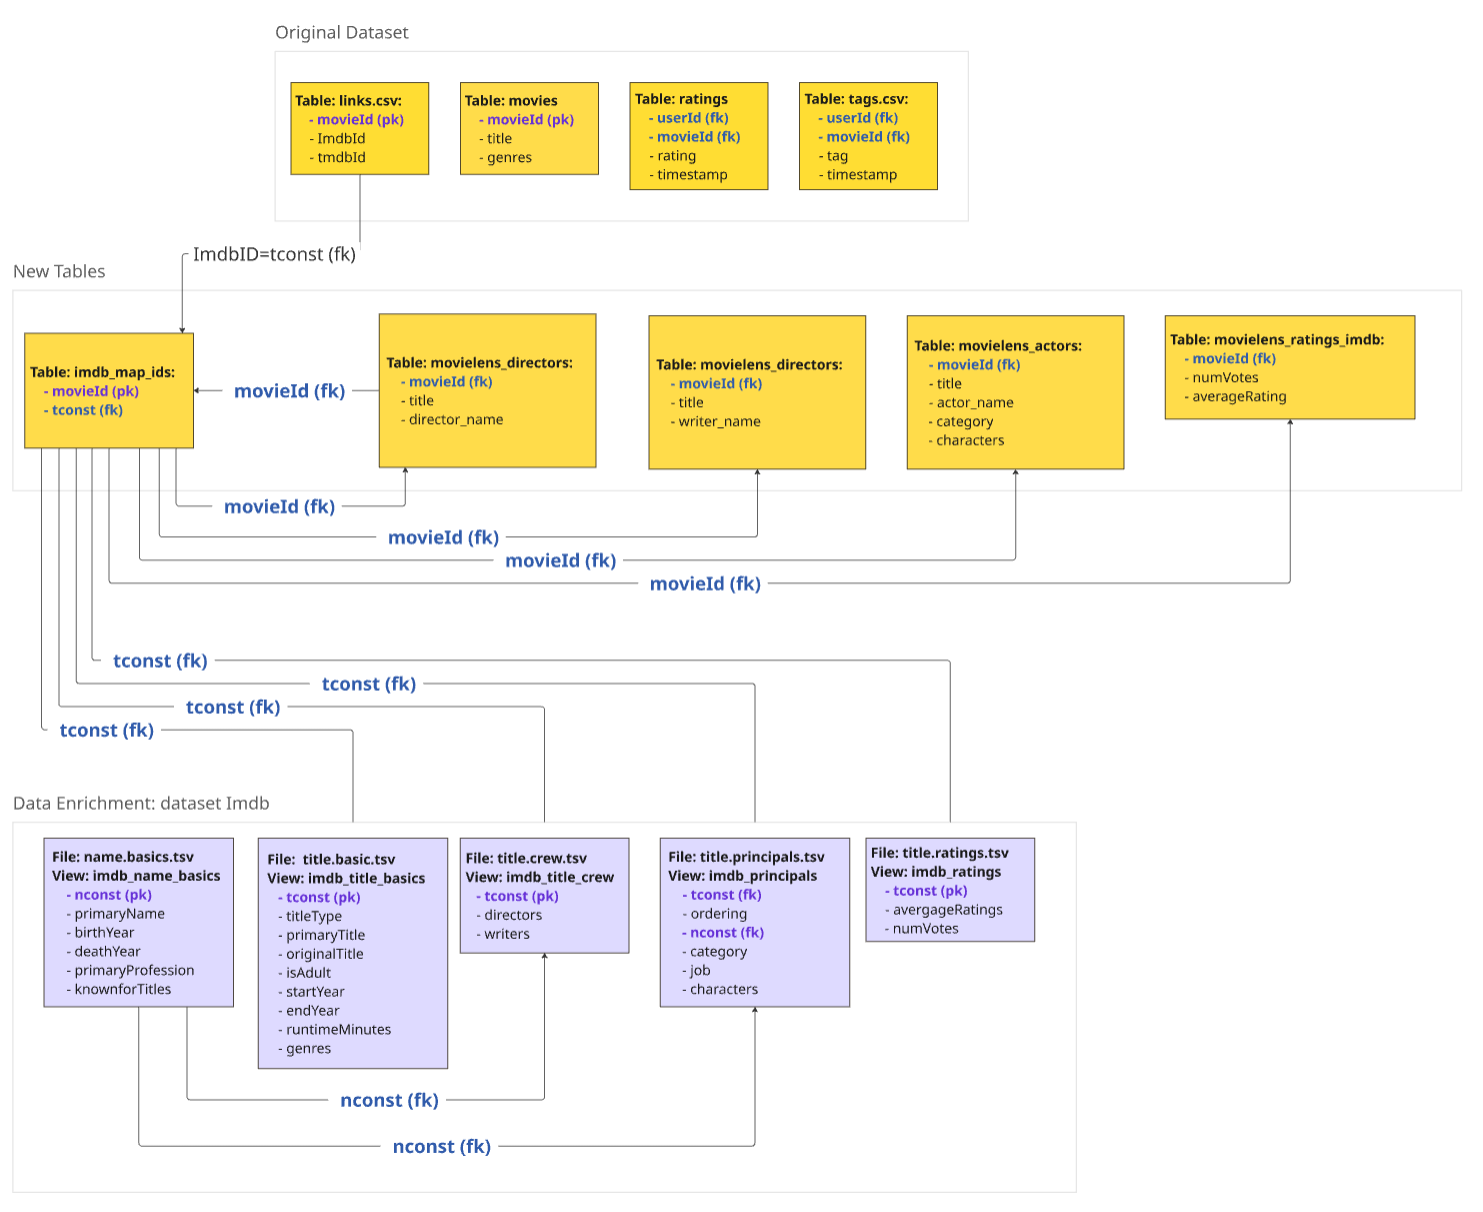

#### Fechar a ligação

In [129]:
con.close()
print("Ligação fechada.")

Ligação fechada.
